In [12]:
import scipy
import numpy 
import pandas 
import matplotlib.pyplot as plt
print(scipy.__version__)
print(numpy.__version__)
print('pandas version:{}'.format(pandas.__version__) ) 

import sklearn
print('sklearn version:{}'.format(sklearn.__version__))

0.19.1
1.13.3
pandas version:0.20.3
sklearn version:0.19.1


In [13]:
from pandas import read_csv
file_name = 'iris.txt'
names = ['separ-length','separ-width','petal-length','petal-width','class']
dataset = read_csv(file_name,names = names)  # 为每个数据特征重新命名
dataset.head(10)

,separ-length,separ-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
dataset.shape #数据维度

(150, 5)

In [15]:
dataset.describe() #行数，均值，标准差，最大最小值，四分位值。

,separ-length,separ-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
dataset.groupby('class').size()  #查看每个分类的分布情况，了解分类是否均匀

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

划分训练集与测试集

In [19]:
from sklearn.model_selection import train_test_split , KFold

seed = 7
iris_array = dataset.values
x , y  = iris_array[:,0:4] , iris_array[:,-1]
x_train , x_validation , y_train , y_validation = train_test_split(x,y,test_size = 0.2,random_state=7)

比较模型

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

In [22]:
from sklearn.model_selection import  KFold , cross_val_score
results = []
for key in models :
    kfold = KFold(n_splits = 10 , random_state = seed ) 
    cv_results = cross_val_score(models[key] , x_train ,y_train , cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    print('%s: %f , %f '%(key,cv_results.mean(),cv_results.std()))

LR: 0.966667 , 0.040825 
LDA: 0.975000 , 0.038188 
KNN: 0.983333 , 0.033333 
CART: 0.975000 , 0.038188 
NB: 0.975000 , 0.053359 
SVM: 0.991667 , 0.025000 


评估模型

In [23]:
from sklearn.metrics import accuracy_score, classification_report

svm = SVC()
svm.fit(x_train , y_train )
predictions = svm.predict(x_validation)
print(accuracy_score(y_validation,predictions))
print(classification_report(y_validation,predictions))


0.933333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



数据相关性 ， 0-无关， 1-完全正相关， -1 - 完全负相关 

In [30]:
from pandas import read_csv
file_name = 'iris.txt'
names = ['separ-length','separ-width','petal-length','petal-width','class']
dataset = read_csv(file_name,names = names)  # 为每个数据特征重新命名
dataset.head(10)


,separ-length,separ-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
dataset.corr()   #correlation 相关性

,separ-length,separ-width,petal-length,petal-width
separ-length,1.000000,-0.109369,0.871754,0.817954
separ-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


### 所有属性的高斯分布偏离
skew() 函数显示数据分布左偏，还是右偏 ， 当数据接近0的时候，表示数据的偏差非常小。

In [33]:
dataset.skew()    

separ-length    0.314911
separ-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64

## 可视化

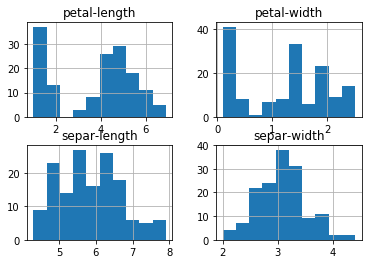

In [38]:
dataset.hist()
plt.show()

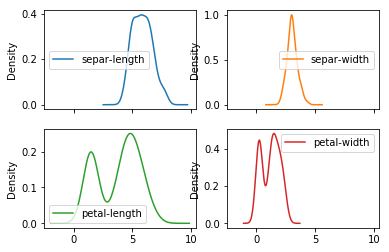

In [37]:
dataset.plot(kind = 'density' , subplots = True , layout = (2,2) ,)
plt.show()

 box 为箱线图, 中位数线同上下四分位数化一个盒子， 上下两条横线表示上下边缘。
 
 游离在上下边缘之外的为异常值 

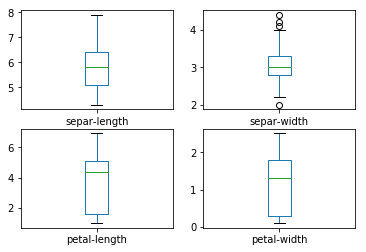

In [39]:
dataset.plot(kind = 'box' , subplots = True , layout = (2,2) )  
plt.show() 

# 第三部分 数据准备 

### 调整数据尺度 
MinMaxScalaer 可以将不同计量单位的数据统一成相同的尺度，将数据标准化到 0 附近，方差为1 


In [73]:
from pandas import read_csv 
from sklearn.preprocessing import MinMaxScaler 

filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 
data = dataset.values[:,:4]  #所有行， 前四列
data = data.astype('float')

transformer = MinMaxScaler(feature_range= (0,1))
data_scale = transformer.fit_transform(data)

data_scale[:10]

array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667],
       [ 0.30555556,  0.79166667,  0.11864407,  0.125     ],
       [ 0.08333333,  0.58333333,  0.06779661,  0.08333333],
       [ 0.19444444,  0.58333333,  0.08474576,  0.04166667],
       [ 0.02777778,  0.375     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.45833333,  0.08474576,  0.        ]])

### 标准化
用normalizer实现标准化

In [74]:
from pandas import read_csv 
from sklearn.preprocessing import Normalizer


filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 
data = dataset.values[:,:4]  #所有行， 前四列
data = data.astype('float')

transformer = Normalizer().fit(data) 
data_normalize = transformer.transform(data)
data_normalize[0:10]

array([[ 0.80377277,  0.55160877,  0.22064351,  0.0315205 ],
       [ 0.82813287,  0.50702013,  0.23660939,  0.03380134],
       [ 0.80533308,  0.54831188,  0.2227517 ,  0.03426949],
       [ 0.80003025,  0.53915082,  0.26087943,  0.03478392],
       [ 0.790965  ,  0.5694948 ,  0.2214702 ,  0.0316386 ],
       [ 0.78417499,  0.5663486 ,  0.2468699 ,  0.05808704],
       [ 0.78010936,  0.57660257,  0.23742459,  0.0508767 ],
       [ 0.80218492,  0.54548574,  0.24065548,  0.0320874 ],
       [ 0.80642366,  0.5315065 ,  0.25658935,  0.03665562],
       [ 0.81803119,  0.51752994,  0.25041771,  0.01669451]])

另有正态化 ： StandardScaler , 输出结果是以0为中位数，方差为1 ，并假定数据符合高斯分布算法的输入。
二值数据： Binarizer ， 设定阈值， 将数据转行成两个数， 大于阈值的设置为1 ， 小于阈值的设置为0 

### 卡方检验选定数据特征
卡方检验就是统计样本的实际观测值与理论推断值之间的偏离程度

偏离程度越大，卡方值越大

若两个值完全相等，则卡方值为0 

In [105]:
from pandas import read_csv 
from sklearn.feature_selection import SelectKBest , chi2 

#导入数据
filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 


#数据处理
x = dataset.values[:,:4]  #所有行， 前四列
x = data.astype('float')
y = dataset.values[:,-1]

#特征选择
test = SelectKBest(score_func = chi2 , k=4 )
fit = test.fit(x,y)
fit.scores_ ,fit.transform(x)  #得到卡方检验对于每一个数据特征的评分， 以及得分最高的四个数据特征

(array([  10.81782088,    3.59449902,  116.16984746,   67.24482759]),
 array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.

### 递归特征消除 
每轮训练后，消除若干权值系数的特征，再给予新的特征集进行下一轮训练

In [114]:
from sklearn.feature_selection import RFE
from pandas import read_csv 
from sklearn.linear_model import LogisticRegression 

#导入数据
filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 

#数据处理
x = dataset.values[:,:4]  #所有行， 前四列
x = data.astype('float')
y = dataset.values[:,-1]

# 训练模型
model = LogisticRegression()

rfe = RFE(model,3)
fit = rfe.fit(x,y)
fit.n_features_ , fit.support_ , fit.ranking_

(3, array([False,  True,  True,  True], dtype=bool), array([2, 1, 1, 1]))

### PCA 
将原始的样本映射到维度更低的样本空间中， 


In [119]:
from pandas import read_csv 
from sklearn.decomposition import PCA 

filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 

x = dataset.values[:,:4]  #所有行， 前四列
x = data.astype('float')
y = dataset.values[:,-1]

pca = PCA(n_components =2 )
fit = pca.fit(x)
fit.explained_variance_ratio_ , fit.components_ 


(array([ 0.92461621,  0.05301557]),
 array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
        [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]]))

# 第四部分 选择模型

### k - Fold 交叉验证
数据分成k组，每组都当一次验证集，其余的做训练集，最终得到k个模型，然后取平均

In [147]:
from pandas import read_csv 
from sklearn.model_selection import KFold , cross_val_score 
from sklearn.linear_model import LogisticRegression 


filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 

x = dataset.values[:,:4]  #所有行， 前四列
x = data.astype('float')
y = dataset.values[:,-1]

num_fold = 5 
kfold = KFold(n_splits = num_fold ,random_state = 4)
model = LogisticRegression()
result = cross_val_score(model ,x ,y , cv = kfold)
result.mean() , result.std()



(0.7533333333333333, 0.26212804335116663)

### logloss 对数损失函数

# 第六章 结果部署  
选定算法，训练好模型之后， 部署到生产环境上。

在实际项目中，我们需要将生成的模型序列化， 并发布到生产环境。 


有新数据出现时，需要反序列化已经保存的模型， 然后用其预测新的数据。 

### 用pickle序列化和反序列化 我们的模型

In [144]:
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from pickle import dump 
from pickle import load 

#导入数据
filename = 'iris.txt' 
names = ['separ_length','separ_width', 'petal_length', 'petal_width','class']
dataset = read_csv(filename,names = names) 

#数据处理
x = dataset.values[:,:4]  #所有行， 前四列
x = data.astype('float')
y = dataset.values[:,-1]

seed = 4 
x_train ,x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.33 ,random_state = seed)

# 训练模型
model = LogisticRegression()
model.fit(x_train,y_train) 
 
# 保存模型
model_file = 'model.sav'
with open(model_file,'wb') as model_f:
    dump(model,model_f)

# 加载模型
with open(model_file,'rb') as model_f :
    loaded_model = load(model_f)
    result = loaded_model.score(x_test,y_test)
    print("准确率：{}".format(result))
    
from sklearn.metrics import f1_score


准确率：0.94


### 用joblib序列化和反序列化

In [97]:
from sklearn.externals.joblib import dump , load 